# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import the libraries you will be using for analysis
import numpy as np  # Version 1.26.4
import pandas as pd  # Version 2.2.2
import matplotlib.pyplot as plt  # Version 3.10.0
import seaborn as sns  # Version 0.13.2

In [6]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [11]:
df = pd.read_parquet('2023-01.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


# Try loading one file

df = pd.read_parquet('2023-01.parquet')
df.info()

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [19]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [21]:
# from google.colab import drive
# drive.mount('/content/drive')

In [25]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/prashant/ai-ml/practice/EDA Assignment/data')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_df = pd.read_parquet(file_path)

        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        monthly_df['date'] = monthly_df['tpep_pickup_datetime'].dt.date
        monthly_df['hour'] = monthly_df['tpep_pickup_datetime'].dt.hour
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        #Get unique date otherwise it loops through each date
        unique_dates = monthly_df['date'].unique()
        for date in unique_dates:
            # Get each date data
            daily_data = monthly_df[monthly_df['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):

                #Get Each hour data
                hour_data = daily_data[daily_data['hour'] == hour]
                # Sample 5% of the hourly data randomly
                
                # As per the instruction in telegram by upgrade buddy, Its mentioned as 07% 
                # to minimise the sample data
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.007, random_state=50)
                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
#Check the output
print(f"Final Sampled Data Shape: {df.shape}")
df.head()

Final Sampled Data Shape: (268150, 22)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
0,2,2023-12-01 00:14:36,2023-12-01 00:14:43,1.0,0.00,2.0,N,79,79,2,...,-0.5,0.00,0.00,-1.0,-74.00,-2.5,0.00,2023-12-01,0,NaN
1,2,2023-12-01 00:23:40,2023-12-01 00:34:57,1.0,2.39,1.0,N,158,230,1,...,0.5,3.70,0.00,1.0,22.20,2.5,0.00,2023-12-01,0,NaN
2,2,2023-12-01 00:21:30,2023-12-01 00:31:16,1.0,1.55,1.0,N,246,164,1,...,0.5,0.00,0.00,1.0,16.40,2.5,0.00,2023-12-01,0,NaN
3,1,2023-12-01 00:04:48,2023-12-01 00:32:08,1.0,10.90,1.0,N,138,231,1,...,0.5,12.70,6.94,1.0,76.39,2.5,1.75,2023-12-01,0,NaN
4,2,2023-12-01 00:20:50,2023-12-01 00:34:22,2.0,1.56,1.0,N,100,68,1,...,0.5,3.84,0.00,1.0,23.04,2.5,0.00,2023-12-01,0,NaN


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [28]:
# Store the df in csv/parquet
df.to_parquet('sampled_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [567]:
# Load the new data file
df = pd.read_parquet("sampled_data.parquet")

In [569]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
0,2,2023-12-01 00:14:36,2023-12-01 00:14:43,1.0,0.00,2.0,N,79,79,2,...,-0.5,0.00,0.00,-1.0,-74.00,-2.5,0.00,2023-12-01,0,NaN
1,2,2023-12-01 00:23:40,2023-12-01 00:34:57,1.0,2.39,1.0,N,158,230,1,...,0.5,3.70,0.00,1.0,22.20,2.5,0.00,2023-12-01,0,NaN
2,2,2023-12-01 00:21:30,2023-12-01 00:31:16,1.0,1.55,1.0,N,246,164,1,...,0.5,0.00,0.00,1.0,16.40,2.5,0.00,2023-12-01,0,NaN
3,1,2023-12-01 00:04:48,2023-12-01 00:32:08,1.0,10.90,1.0,N,138,231,1,...,0.5,12.70,6.94,1.0,76.39,2.5,1.75,2023-12-01,0,NaN
4,2,2023-12-01 00:20:50,2023-12-01 00:34:22,2.0,1.56,1.0,N,100,68,1,...,0.5,3.84,0.00,1.0,23.04,2.5,0.00,2023-12-01,0,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268150 entries, 0 to 268149
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               268150 non-null  int64         
 1   tpep_pickup_datetime   268150 non-null  datetime64[us]
 2   tpep_dropoff_datetime  268150 non-null  datetime64[us]
 3   passenger_count        258378 non-null  float64       
 4   trip_distance          268150 non-null  float64       
 5   RatecodeID             258378 non-null  float64       
 6   store_and_fwd_flag     258378 non-null  object        
 7   PULocationID           268150 non-null  int64         
 8   DOLocationID           268150 non-null  int64         
 9   payment_type           268150 non-null  int64         
 10  fare_amount            268150 non-null  float64       
 11  extra                  268150 non-null  float64       
 12  mta_tax                268150 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [40]:
# Fix the index and drop any columns that are not needed
# These colums creatd to create a sampled data, so dropping these columns
df = df.drop(columns=['hour', 'date'])

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [43]:
# Combine the two airport fee columns

# From the info() there is 237479 non null Airport_fee & 20899 non null airport_fee codataframe_columns
# combine_first to combine Airport_fee null value to airport_fee values
df['Airport_fee_combined'] = df['Airport_fee'].combine_first(df['airport_fee'])

#drop Airport_fee and airport_fee
df=df.drop(columns=['Airport_fee', 'airport_fee'])

# rename Airport_fee_combined to Airport_fee total count of 258378
df.rename(columns={'Airport_fee_combined':'Airport_fee'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268150 entries, 0 to 268149
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               268150 non-null  int64         
 1   tpep_pickup_datetime   268150 non-null  datetime64[us]
 2   tpep_dropoff_datetime  268150 non-null  datetime64[us]
 3   passenger_count        258378 non-null  float64       
 4   trip_distance          268150 non-null  float64       
 5   RatecodeID             258378 non-null  float64       
 6   store_and_fwd_flag     258378 non-null  object        
 7   PULocationID           268150 non-null  int64         
 8   DOLocationID           268150 non-null  int64         
 9   payment_type           268150 non-null  int64         
 10  fare_amount            268150 non-null  float64       
 11  extra                  268150 non-null  float64       
 12  mta_tax                268150 non-null  floa

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [45]:
# check where values of fare amount are negative
# 
# df[df['fare_amount'] == 0 ]
df[ df['fare_amount'] < 0 ]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-12-01 00:14:36,2023-12-01 00:14:43,1.0,0.00,2.0,N,79,79,2,-70.0,0.0,-0.5,0.0,0.00,-1.0,-74.00,-2.5,0.00
187,2,2023-12-01 10:56:36,2023-12-01 11:11:23,2.0,1.72,1.0,N,125,234,4,-14.9,0.0,-0.5,0.0,0.00,-1.0,-18.90,-2.5,0.00
239,2,2023-12-01 11:45:02,2023-12-01 12:27:17,1.0,1.52,1.0,N,234,100,4,-32.4,0.0,-0.5,0.0,0.00,-1.0,-36.40,-2.5,0.00
379,2,2023-12-01 14:18:22,2023-12-01 15:39:35,2.0,17.48,2.0,N,132,163,4,-70.0,0.0,-0.5,0.0,-6.94,-1.0,-82.69,-2.5,-1.75
511,2,2023-12-01 17:05:15,2023-12-01 17:11:05,1.0,0.75,1.0,N,90,107,4,-7.2,-2.5,-0.5,0.0,0.00,-1.0,-13.70,-2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267945,2,2023-07-31 17:07:15,2023-07-31 17:22:31,1.0,5.51,1.0,N,13,107,4,-24.7,-2.5,-0.5,0.0,0.00,-1.0,-31.20,-2.5,0.00
267949,2,2023-07-31 17:30:05,2023-07-31 17:31:44,1.0,0.25,1.0,N,75,75,2,-3.7,-2.5,-0.5,0.0,0.00,-1.0,-10.20,-2.5,0.00
267954,2,2023-07-31 17:33:41,2023-07-31 17:40:08,4.0,0.99,1.0,N,170,90,4,-7.9,-2.5,-0.5,0.0,0.00,-1.0,-14.40,-2.5,0.00
268035,2,2023-07-31 19:37:30,2023-07-31 19:48:55,1.0,2.16,1.0,N,170,249,4,-12.8,-2.5,-0.5,0.0,0.00,-1.0,-19.30,-2.5,0.00


In [47]:
# Get the count of fare amount is less than 0
df[df['fare_amount'] < 0 ].value_counts().sum()

2612

Did you notice something different in the `RatecodeID` column for above records?

In [50]:
# There are two observations
# From the data dictionary Ratecard should between 1 to 6 
#  1. RatecardID is null, that means NaN
#  2. RatecardID is 0 or less than 0  - this is not defined in data dictionary 

In [52]:
#  1st case when RatecardID is null
df[df['RatecodeID'].isnull()].shape

(9772, 19)

In [54]:
# 2nd case RatecardID is less than or equal to 0
df[(df['RatecodeID'] <= 0 )].shape

(0, 19)

In [56]:
# Only first case found the records. and did not find any RatecardID with 0 value

In [58]:
# Analyse RatecodeID for the negative fare amounts
# Based on the above analysis there is posiblity of null values when fare_amount is negative 
# So check RatecardID null with fare_amount less then 0
df[(df['RatecodeID'].isnull()) & (df['fare_amount'] < 0)]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
5679,2,2023-12-07 19:49:14,2023-12-07 20:04:51,NaN,4.40,NaN,None,137,148,0,-0.11,0.0,0.5,0.00,0.00,1.0,3.89,NaN,NaN
5805,2,2023-12-07 21:08:19,2023-12-07 21:25:12,NaN,3.39,NaN,None,166,163,0,-0.20,0.0,0.5,0.00,0.00,1.0,3.80,NaN,NaN
5923,2,2023-12-08 00:45:03,2023-12-08 01:01:13,NaN,2.75,NaN,None,79,231,0,-3.00,0.0,0.5,0.00,0.00,1.0,1.00,NaN,NaN
6497,2,2023-12-08 17:17:06,2023-12-08 17:37:00,NaN,1.93,NaN,None,158,148,0,-0.11,0.0,0.5,0.00,0.00,1.0,3.89,NaN,NaN
7560,2,2023-12-09 19:11:08,2023-12-09 19:26:45,NaN,1.80,NaN,None,236,229,0,-1.42,0.0,0.5,0.00,0.00,1.0,2.58,NaN,NaN
7605,2,2023-12-09 20:59:09,2023-12-09 21:18:50,NaN,2.41,NaN,None,100,211,0,-0.11,0.0,0.5,0.00,0.00,1.0,3.89,NaN,NaN
7833,2,2023-12-10 00:48:43,2023-12-10 00:53:46,NaN,0.98,NaN,None,238,239,0,-3.00,0.0,0.5,0.00,0.00,1.0,1.00,NaN,NaN
7847,2,2023-12-10 00:24:05,2023-12-10 00:33:57,NaN,2.31,NaN,None,43,141,0,-0.72,0.0,0.5,0.00,0.00,1.0,3.28,NaN,NaN
8695,2,2023-12-11 09:03:08,2023-12-11 09:15:27,NaN,1.68,NaN,None,262,237,0,-0.61,0.0,0.5,0.00,0.00,1.0,3.39,NaN,NaN
9090,2,2023-12-11 18:24:34,2023-12-11 18:36:06,NaN,1.75,NaN,None,238,140,0,-1.00,0.0,0.5,0.00,0.00,1.0,3.00,NaN,NaN


In [60]:
#  There are few data with -ve fare_amount with RetecardID is null

In [62]:
# Find which columns have negative values

# Find all monetary columns[] with negative values 
# Get all columns with int and float types
# Filter rows where RatecodeID is null as we saw earlier there is no 0 value of RatecardID found
filtered_df = df[df['RatecodeID'].isnull()]

# Loop through the columns that have negative values
negative_columns = []

for col in filtered_df.select_dtypes(include=['int64', 'float64']).columns:
    if (filtered_df[col] < 0).any():  # Check if any negative value exists in the column
        negative_columns.append(col)
print("Columns with negative values where RatecodeID > 0:", negative_columns)

Columns with negative values where RatecodeID > 0: ['fare_amount', 'total_amount']


In [64]:
# fix these negative values
# Find the total count of -ve values from each columns
for column in negative_columns:
    negative_count = (df[column] < 0).sum() 
    print(f"Column: {column} has {negative_count} negative values.")
    

Column: fare_amount has 2670 negative values.
Column: total_amount has 2628 negative values.


In [66]:
# We found two column affected withe RatecardID is null
# These numbers are not more to fix. its better to drop these rows. 

In [68]:
# check total dataset 
before_drop_rows = df.shape
print("Before drop rows ", before_drop_rows[0])

Before drop rows  268150


In [70]:
# These records can be dropped for those RatecardID is null 
# This count is very less compare to total data set. 
# loop through same negative_columns and drop the rows
for column in negative_columns:
    # Drop rows with negative values in the column with RatecardID is null
    df = df[~((df['RatecodeID'].isnull()) & (df[column] < 0))]

after_drop_rows = df.shape
print("After drop rows ", after_drop_rows[0])

After drop rows  268092


In [72]:
#  Total rows dropped
total_dropped_rows = before_drop_rows[0] - after_drop_rows[0]
print("Total rows dropped ", total_dropped_rows)

Total rows dropped  58


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [76]:
# Find the proportion of missing values in each column
missing_proportion = df.isnull().mean() * 100
print(missing_proportion )

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.623383
trip_distance            0.000000
RatecodeID               3.623383
store_and_fwd_flag       3.623383
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.623383
Airport_fee              3.623383
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [79]:
# Display the rows with null values
null_passenger_count = df[df['passenger_count'].isnull()].shape
print("Passenger count is null ", null_passenger_count[0])

Passenger count is null  9714


In [81]:
# Impute NaN values in 'passenger_count' with mode value
# df['passenger_count'].mode()
# Mode is the best value for passenger_count, as mean will provide the float value.
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)
total_passenger_count = df[df['passenger_count'].isnull()].shape
print("Total number of records with passenger count is null after fix : ", total_passenger_count[0])

Total number of records with passenger count is null after fix :  0


Did you find zeroes in passenger_count? Handle these.

In [84]:
# Handle 0 passenger_count
total_passenger_count = df[df['passenger_count'] == 0].shape
print("Total number of records with passenger with count 0 : ", total_passenger_count[0])

Total number of records with passenger with count 0 :  4113


In [86]:
# Impute 0 values in 'passenger_count' with mode value
# df['passenger_count'].mode()
# Mode is the best value for passenger_count, as mean will provide the float value.

df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].mode()[0])

total_passenger_count = df[df['passenger_count'] == 0].shape
print("Total number of records with passenger with count 0 after fixing : ", total_passenger_count[0])

Total number of records with passenger with count 0 after fixing :  0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [89]:
# Fix missing values in 'RatecodeID'
# Get the total number of null values
df[df['RatecodeID'].isnull()].shape[0]

9714

In [91]:
# get median value as its faily distributed
median_value = df['RatecodeID'].median()
df['RatecodeID'].fillna(median_value, inplace=True)

In [93]:
total_null_rate_id = df[df['RatecodeID'].isnull()].shape[0]
print("Total RatecodeID with null values : ", total_null_rate_id)

Total RatecodeID with null values :  0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [96]:
# handle null values in congestion_surcharge
# Get the total count of null values of congestion_surcharge
print("Total count of null congestion_surcharge : ", df[df['congestion_surcharge'].isnull()].shape[0])

Total count of null congestion_surcharge :  9714


In [98]:
# check mean, Median, and mode
print("Mean : ", df['congestion_surcharge'].mean())
print("Median : ", df['congestion_surcharge'].median())
print("Mode : ", df['congestion_surcharge'].mode()[0])

Mean :  2.26255524851187
Median :  2.5
Mode :  2.5


In [100]:
# Median is best value here in this distribution to replace
median_value = df['congestion_surcharge'].median()
df['congestion_surcharge'].fillna(median_value, inplace=True)
print("Total count of null congestion_surcharge after cleanup : ", df[df['congestion_surcharge'].isnull()].shape[0])

Total count of null congestion_surcharge after cleanup :  0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [103]:
# Handle any remaining missing values
null_rows = df[df.isnull().any(axis=1)]
null_columns = null_rows.columns[null_rows.isnull().any()].tolist()
print("Columns with null :",null_columns)

Columns with null : ['store_and_fwd_flag', 'Airport_fee']


In [105]:
print("Total number of null store_and_fwd_flag", df[df['store_and_fwd_flag'].isnull()].shape[0])

Total number of null store_and_fwd_flag 9714


In [107]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    256807
Y      1571
Name: count, dtype: int64

In [109]:
# There are Y or N values
# set mode value for the null value
mode_value = df['store_and_fwd_flag'].mode()[0]
print("Mode value", mode_value)
df['store_and_fwd_flag'].fillna(mode_value, inplace=True)
print("Total number of null store_and_fwd_flag after fix", df[df['store_and_fwd_flag'].isnull()].shape[0])

Mode value N
Total number of null store_and_fwd_flag after fix 0


In [111]:
# Handle Airport_fee for null 
# Get total count of Airport_fee is null
print("Total number of null Airport_fee when RatecardID = 2, JFK ", df[(df['RatecodeID'] == 2) & (df['Airport_fee'].isnull())].shape[0])
print("Total number of null Airport_fee when RatecardID not 2, JFK ", df[ df['Airport_fee'].isnull()].shape[0])

Total number of null Airport_fee when RatecardID = 2, JFK  0
Total number of null Airport_fee when RatecardID not 2, JFK  9714


In [113]:
# Based on the above, when RatecardID is 2 then found 0 null Airport fees, then rest should be set as 0 or Mode value 
mode_value = df['Airport_fee'].mode()[0]
print("Mode value", mode_value)
df['Airport_fee'].fillna(mode_value, inplace=True)
print("Total number of null Airport_fee when RatecardID not 2 after null fix ", df[ df['Airport_fee'].isnull()].shape[0])

Mode value 0.0
Total number of null Airport_fee when RatecardID not 2 after null fix  0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

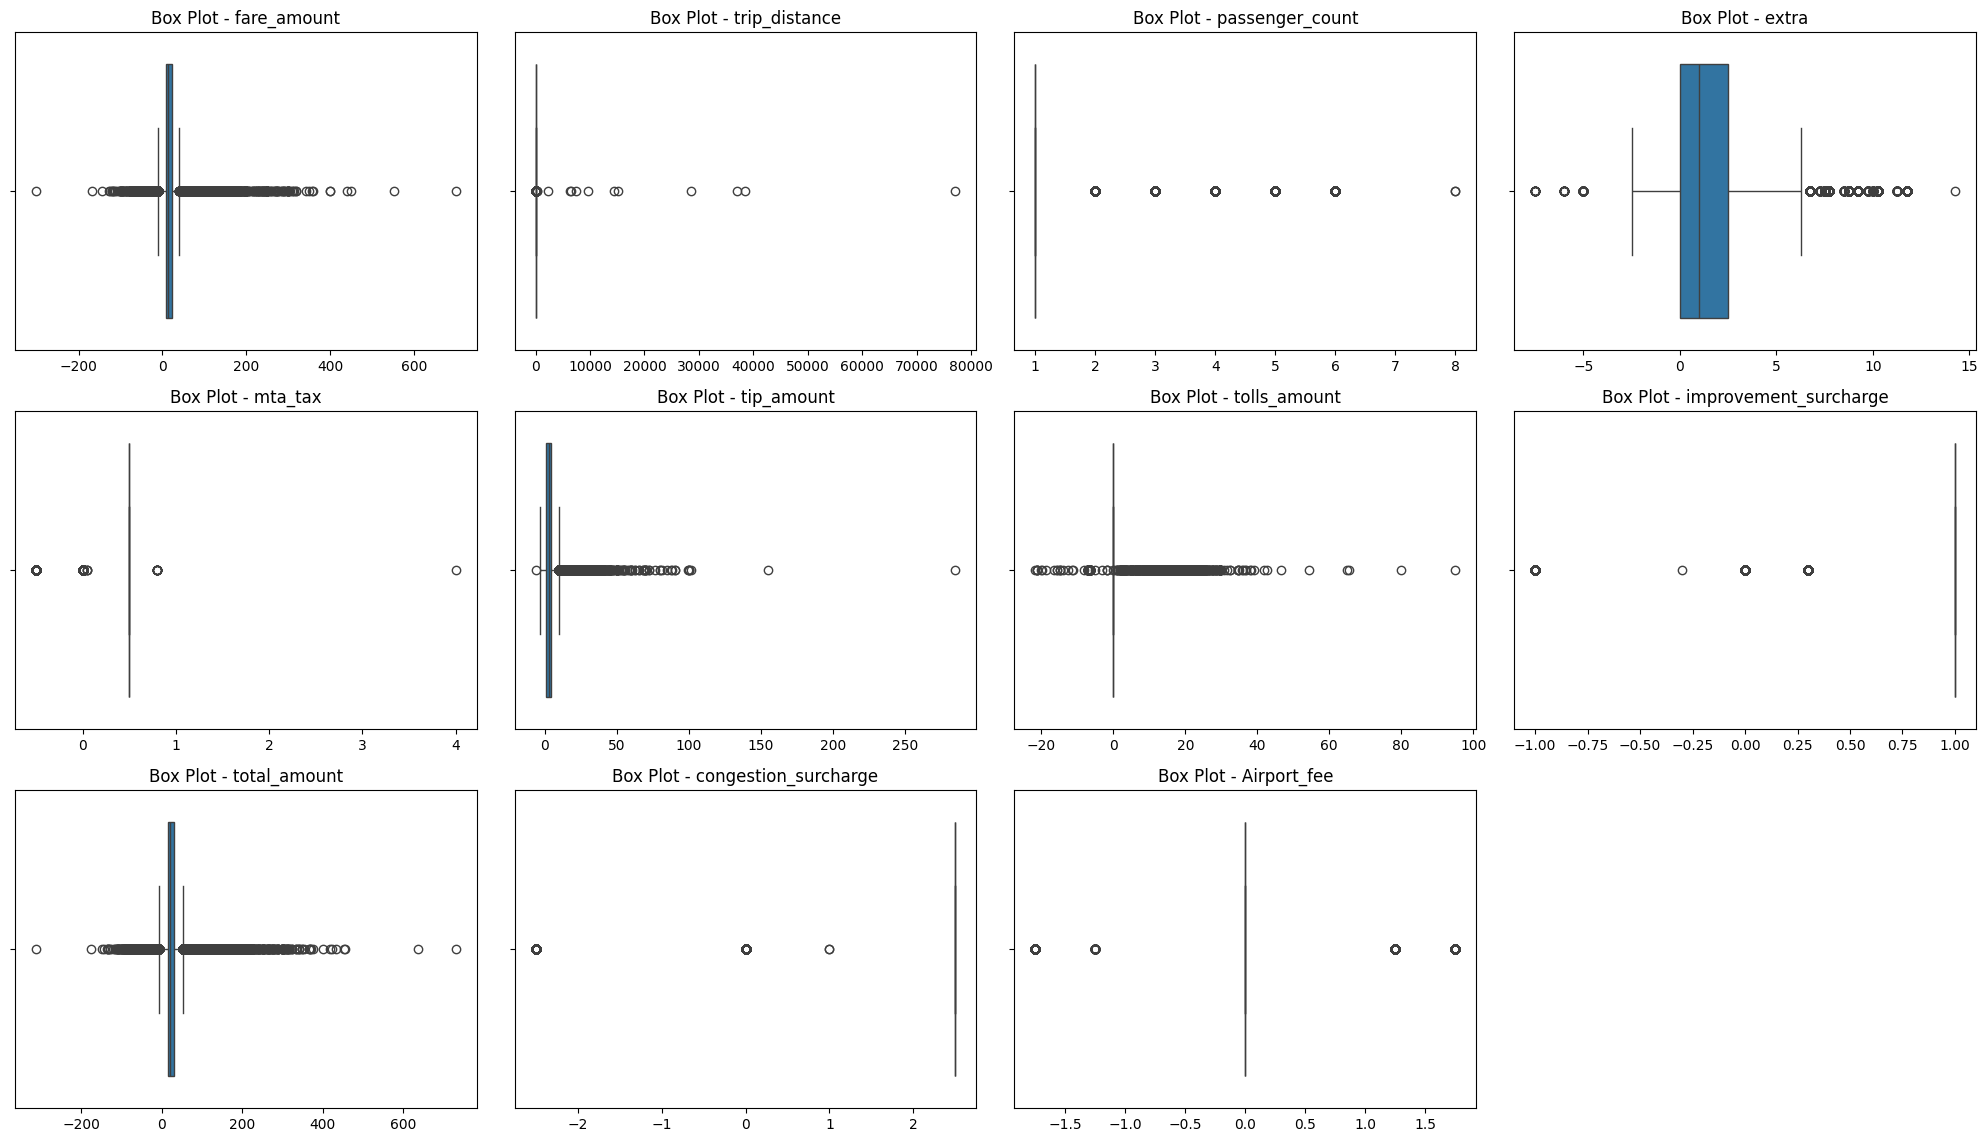

In [117]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Check all the columns with outlier using subplot 
columns_to_plot = ['fare_amount', 'trip_distance', 'passenger_count', 
                   'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
                   'improvement_surcharge', 'total_amount', 
                   'congestion_surcharge', 'Airport_fee']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()
for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Box Plot - {col}')
    axes[i].set_xlabel('')

# Hide any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

In [121]:
# Case 1
# - Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
outliers_distance_fare = df[(df['trip_distance'] <= 0.1) & (df['fare_amount'] > 300)]
print(outliers_distance_fare.shape)

(4, 19)


In [123]:
# Case 2
# Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)abs
outliers_distance_fare_zero_diff_zones = df[
    (df['trip_distance'] == 0) &
    (df['fare_amount'] == 0) &
    (df['PULocationID'] != df['DOLocationID'])
]
print(outliers_distance_fare_zero_diff_zones.shape)

(7, 19)


In [125]:
# Case 3
# Entries where `trip_distance` is more than 250  miles.
outliers_long_trip = df[df['trip_distance'] > 250]
print("Total of trips with more than 250 miles", outliers_long_trip.shape)
# check with fare_amount 
fare_amount_distance =df[df['trip_distance'] > 250][['fare_amount','trip_distance']]
print("Check the failre amount with distance ", fare_amount_distance)
# These entries should be removed as these are outlier
df = df[df['trip_distance'] <= 250]
outliers_long_trip = df[df['trip_distance'] > 250]
print("Total of trips with more than 250 miles after remove ", outliers_long_trip.shape)

Total of trips with more than 250 miles (12, 19)
Check the failre amount with distance          fare_amount  trip_distance
22767         19.10        2304.52
26425         14.24       77116.16
84222         20.30       28622.53
127575        16.46        6304.78
132626        30.33       38378.31
158393        29.55         322.79
212405        11.51       15199.20
214899        70.00        6567.35
217304         7.97       14477.29
246830        44.37       37058.44
254499        47.10        9682.27
255933        23.50        7501.70
Total of trips with more than 250 miles after remove  (0, 19)


In [127]:
# Case 4
# - Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)abs
outliers_payment_type = df[df['payment_type'] == 0]
print(outliers_payment_type.shape)

(9706, 19)


In [129]:
# Out of all 4 cases, case1 and Case 2 can be dropped as 
# when in case 1 trip_distance is 0 and fare_amount is more than 300 then its false entry or there is missing trip_distance value. 
# but when fare amount is more than 300 then it will became outlier
# In case 2 fare_amount & trip_distance is 0, but taxi is moved from pickup and drop point.
# there could be chance to calculate trip_distance, but it required more analysis time on giolocation distance calculation
# So considering small data, its better to drop these rows
outlier_indices = pd.concat([
    outliers_distance_fare,
    outliers_distance_fare_zero_diff_zones,
]).index
df = df.drop(outlier_indices)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268069 entries, 0 to 268149
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               268069 non-null  int64         
 1   tpep_pickup_datetime   268069 non-null  datetime64[us]
 2   tpep_dropoff_datetime  268069 non-null  datetime64[us]
 3   passenger_count        268069 non-null  float64       
 4   trip_distance          268069 non-null  float64       
 5   RatecodeID             268069 non-null  float64       
 6   store_and_fwd_flag     268069 non-null  object        
 7   PULocationID           268069 non-null  int64         
 8   DOLocationID           268069 non-null  int64         
 9   payment_type           268069 non-null  int64         
 10  fare_amount            268069 non-null  float64       
 11  extra                  268069 non-null  float64       
 12  mta_tax                268069 non-null  float64  

First, let us remove 7+ passenger counts as there are very less instances.

In [132]:
# remove passenger_count > 6
print("Count of passenger_count > 6 :", df[df['passenger_count'] > 6].shape[0])
passenger_count = df[df['passenger_count'] > 6]
df=df.drop(passenger_count.index)
df.shape

Count of passenger_count > 6 : 2


(268067, 19)

In [134]:
# Continue with outlier handling
# From the outlier plot, I can see there some columns with -ve values

numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Find columns with negative values
negative_columns = numeric_columns.columns[(numeric_columns < 0).any()]
print("Negative value columns ", negative_columns)

Negative value columns  Index(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')


In [136]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [139]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [143]:
### These are numerical, as these are related to amount or cost or charge

# * `fare_amount`
# * `extra`
# * `mta_tax`
# * `tip_amount`
# * `tolls_amount`
# * `improvement_surcharge`
# * `total_amount`
# * `congestion_surcharge`
# * `airport_fee`

# These are Categorical parameters
# * `VendorID`
# * `tpep_pickup_datetime`
# * `tpep_dropoff_datetime`
# * `RatecodeID`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

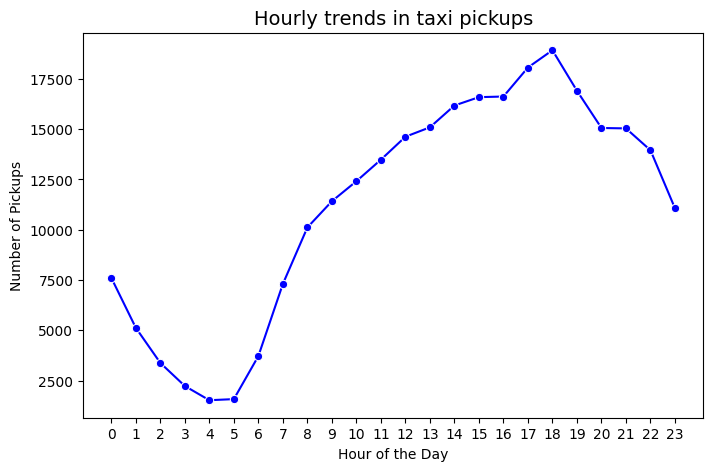

In [147]:
# Find and show the hourly trends in taxi pickups

# Extract pickup hour from datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by pickup hour to count the number of trips
hourly_trends = df.groupby('pickup_hour').size().reset_index(name='number_of_pickups')

# Plotting the hourly trends
plt.figure(figsize=(8, 5))
# Plot the lineplot as x axis as pickup hours and y axis as number of pickups
sns.lineplot(data=hourly_trends, x='pickup_hour', y='number_of_pickups', marker='o', color='blue',seed=24)
plt.title("Hourly trends in taxi pickups", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
# Show each hour trend
plt.xticks(range(0, 24)) 
plt.show()

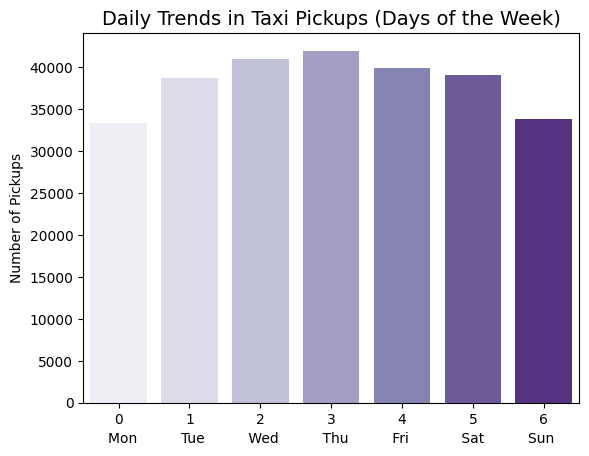

In [149]:
# Find and show the daily trends in taxi pickups (days of the week)

# Get the data as day of the week from tpep_pickup_datetime
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

# Group by day of the week and count the number of trips
daily_trends = df.groupby('pickup_day_of_week').size().reset_index(name='number_of_pickup')

# Bar plot to show the trend
sns.barplot(data=daily_trends, x='pickup_day_of_week', y='number_of_pickup', palette='Purples')
plt.title("Daily Trends in Taxi Pickups (Days of the Week)", fontsize=14)
plt.xlabel("Mon          Tue          Wed          Thu          Fri            Sat          Sun")
plt.ylabel("Number of Pickups")
plt.show()


Monthly Trentds     pickup_month  number_of_pickup
0              1             21455
1              2             20402
2              3             23832
3              4             22993
4              5             24585
5              6             23129
6              7             20359
7              8             19754
8              9             19930
9             10             24637
10            11             23388
11            12             23603


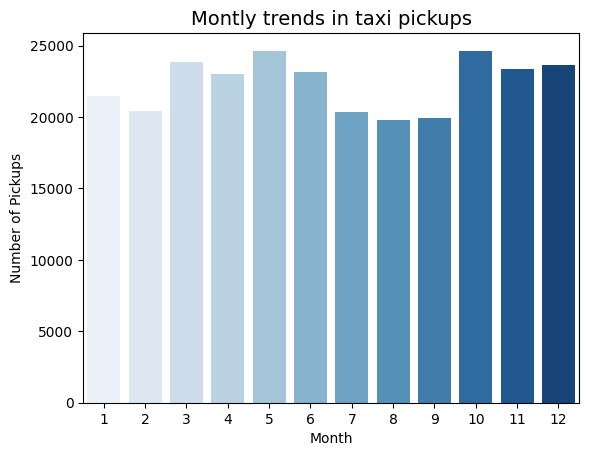

In [259]:
# Show the monthly trends in pickups

# Get the data of the month from tpep_pickup_datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Group by day of the week and count the number of trips
monthly_trends = df.groupby('pickup_month').size().reset_index(name='number_of_pickup')
print("Monthly Trentds", monthly_trends)
# Plot bar chart 
sns.barplot(data=monthly_trends, x='pickup_month', y='number_of_pickup', palette='Blues')
plt.title("Montly trends in taxi pickups", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
# Show each hour trend
plt.xticks(range(0, 12)) 
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [155]:
# Analyse the above parameters

# Initialize empty dictionary to store results
results = {}

# Check for zero and negative values
for col in ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    results[col] = {
        "Zero Values": zero_count,
        "Negative Values": negative_count
    }

# Display results
pd.DataFrame(results).transpose()


,Zero Values,Negative Values
fare_amount,91,2612
tip_amount,63533,15
total_amount,42,2625
trip_distance,5502,0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [160]:
# Create a df with non zero entries for the selected parameters.
# Filter conditions
filtered_df = df[
    (df['fare_amount'] > 0) & 
    (df['tip_amount'] >= 0) & 
    (df['total_amount'] > 0) & 
    ((df['trip_distance'] > 0) | ((df['trip_distance'] == 0) & (df['fare_amount'] > 0)))
]

# Check the shape after filtering
print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {filtered_df.shape}")


Original DataFrame shape: (268067, 22)
Filtered DataFrame shape: (265364, 22)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

Montly revenue      month  total_amount
0       1     580934.23
1       2     546881.30
2       3     658243.12
3       4     654054.87
4       5     713096.60
5       6     668538.79
6       7     580360.80
7       8     568418.05
8       9     599916.76
9      10     722232.42
10     11     669107.16
11     12     675839.53


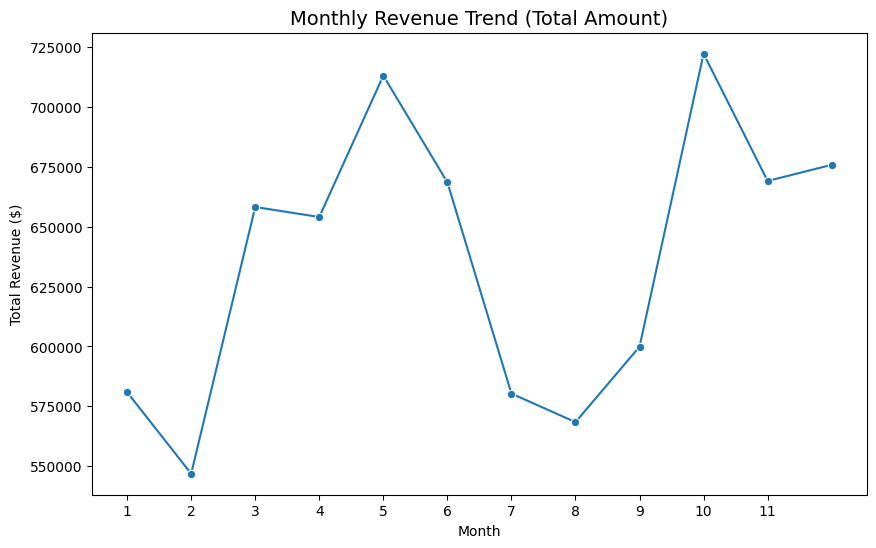

In [266]:
# Group data by month and analyse monthly revenue

df['month'] = df['tpep_pickup_datetime'].dt.month

# Group by month and calculate total monthly revenue
monthly_revenue = df.groupby('month')['total_amount'].sum().reset_index()

# Plot the monthly revenue trend
# Ensure tpep_pickup_datetime is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract month from the pickup datetime
df['month'] = df['tpep_pickup_datetime'].dt.month

# Group by month and calculate total monthly revenue
monthly_revenue = df.groupby('month')['total_amount'].sum().reset_index()
print("Montly revenue ", monthly_revenue)
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_revenue, x='month', y='total_amount', marker='o' )

# Add labels and title
plt.title("Monthly Revenue Trend (Total Amount)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(range(1, 12)) 
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

   quarter  total_amount  proportion
0        1    1786058.65   23.385005
1        2    2035690.26   26.653451
2        3    1748695.61   22.895808
3        4    2067179.11   27.065737


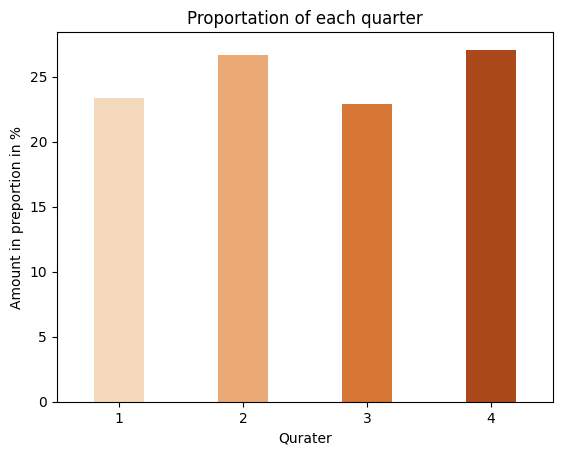

In [167]:
# Calculate proportion of each quarter

# Extract the quarter from the datetime column
df['quarter'] = df['tpep_pickup_datetime'].dt.quarter
# Group by quarter and calculate total revenue
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()
# Calculate total revenue for the entire year
total_revenue = quarterly_revenue['total_amount'].sum()

# Calculate the proportion of each quarter
quarterly_revenue['proportion'] = (quarterly_revenue['total_amount'] / total_revenue) * 100

# Display the proportion of each quarter
print(quarterly_revenue)
plt.figure()
sns.barplot(data=quarterly_revenue, x='quarter', y='proportion', width=0.4, palette="Oranges")
plt.title("Proportation of each quarter")
plt.xlabel("Qurater")
plt.ylabel("Amount in preportion in %")
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

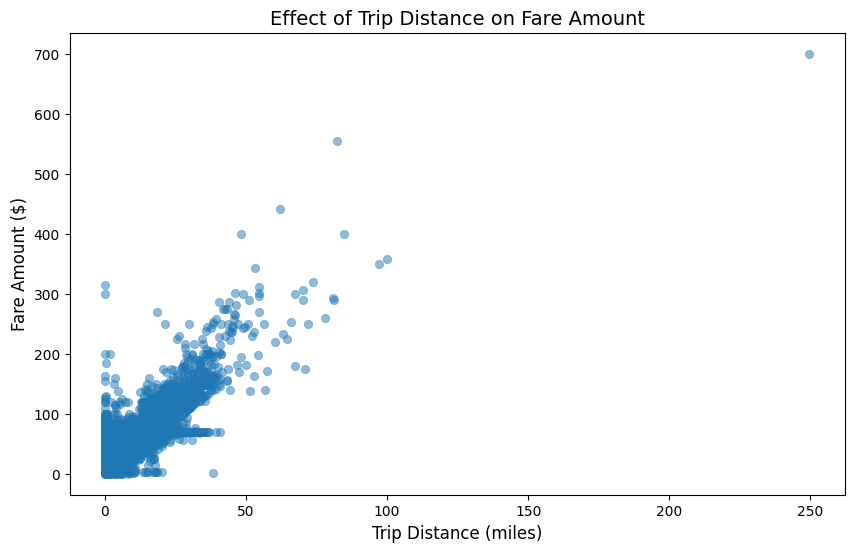

In [525]:
# Show how trip fare is affected by distance

# Ensure fare amount should be more than 0 
df = df[df["fare_amount"] > 0]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', alpha=0.5, edgecolor=None)

# Add labels and title
plt.title("Effect of Trip Distance on Fare Amount", fontsize=14)
plt.xlabel("Trip Distance (miles)", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)

# Show plot
plt.show()

In [172]:
df[df['trip_distance'] > 100][['fare_amount','trip_distance']]

,fare_amount,trip_distance
97636,700.0,249.63
194579,357.9,100.03


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`s

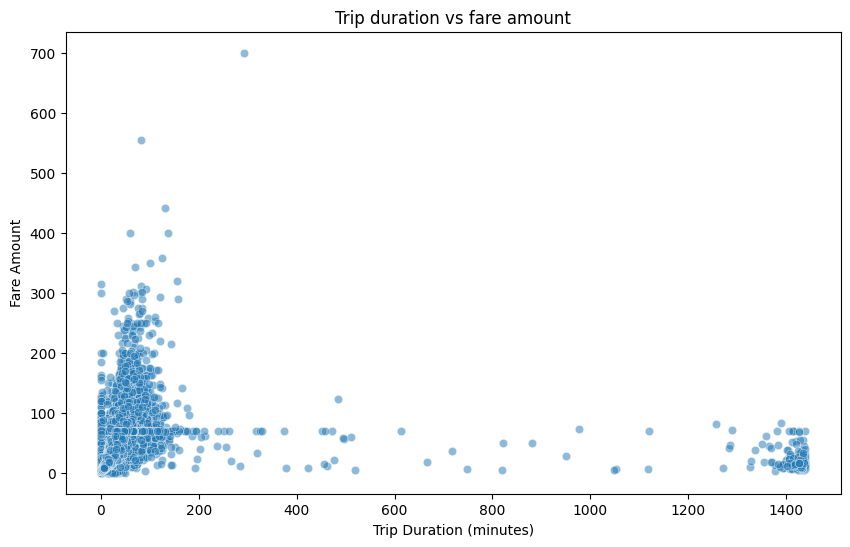

In [527]:
# Show relationship between fare and trip duration
# Ensure fare amount should be more than 0 
df = df[df["fare_amount"] > 0]
# Calculate trip duration in minutes
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60
# Scatter plot to show relationship
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["trip_duration"], y=df["fare_amount"], alpha=0.5)
plt.title("Trip duration vs fare amount")
# Labels and title
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount")
plt.show()


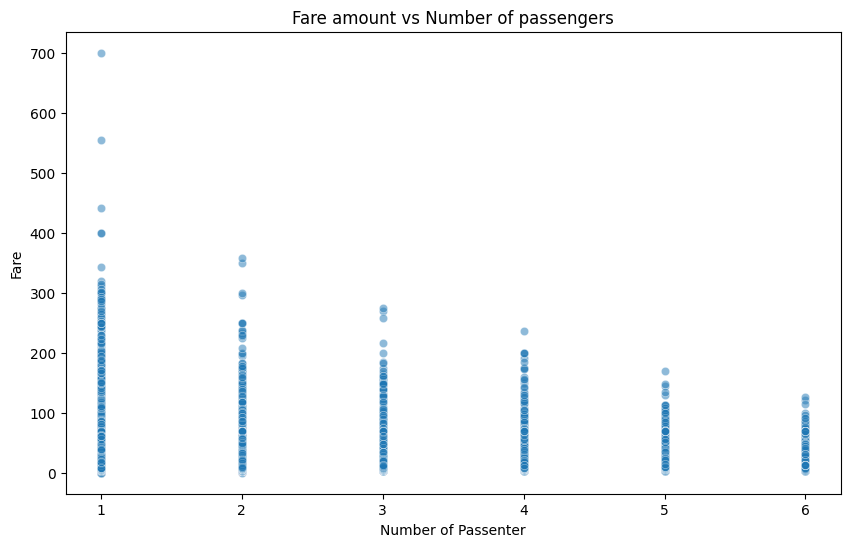

In [529]:
# Show relationship between fare and number of passengers

# Scatter plot to show relationship
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["passenger_count"], y=df["fare_amount"], alpha=0.5)
plt.title("Fare amount vs Number of passengers")
# Labels and title
plt.xlabel("Number of Passenter")
plt.ylabel("Fare")
plt.show()

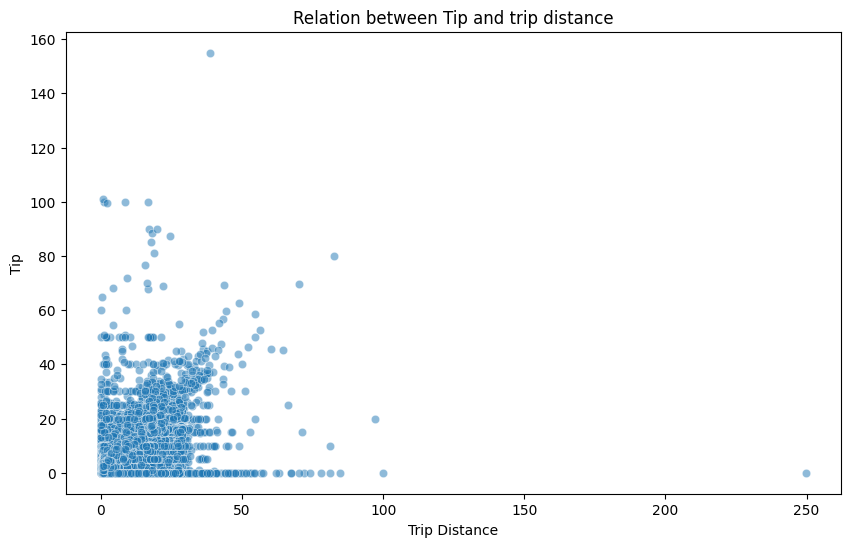

In [531]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["trip_distance"], y=df["tip_amount"], alpha=0.5)
plt.title("Relation between Tip and trip distance")
# Labels and title
plt.xlabel("Trip Distance")
plt.ylabel("Tip")
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [183]:
df['payment_type'].value_counts()

payment_type
1    208582
2     44591
0      9706
4      3520
3      1668
Name: count, dtype: int64

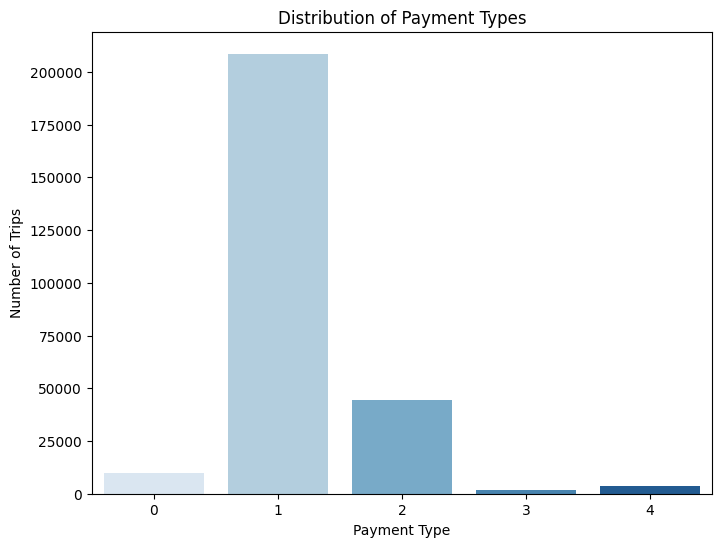

In [185]:
# Analyse the distribution of different payment types (payment_type).

# Get the category of payment type and count
payment_types = df['payment_type'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=payment_types.index, y=payment_types.values, palette="Blues")

plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.title("Distribution of Payment Types")

plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [191]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [227]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('../taxi_zones/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

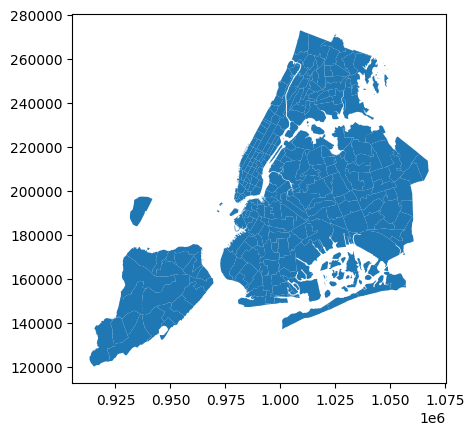

In [230]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [234]:
# Merge zones and trip records using locationID and PULocationID

# verify data types of locationID and PULocationID
print("Taxi Zone datat types \n",zones.dtypes)
print("Taxi data frame types \n",df.dtypes)

# merge 
merged_df = df.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

merged_df.head()


Taxi Zone datat types 
 OBJECTID         int32
Shape_Leng     float64
Shape_Area     float64
zone            object
LocationID       int32
borough         object
geometry      geometry
dtype: object
Taxi data frame types 
 VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
pickup_hour      

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,month,quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-12-01 00:14:36,2023-12-01 00:14:43,1.0,0.00,2.0,N,79,79,2,...,12,4,0.116667,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
1,2,2023-12-01 00:23:40,2023-12-01 00:34:57,1.0,2.39,1.0,N,158,230,1,...,12,4,11.283333,158.0,0.054810,0.000186,Meatpacking/West Village West,158.0,Manhattan,"POLYGON ((982091.02 209596.704, 982318.344 209..."
2,2,2023-12-01 00:21:30,2023-12-01 00:31:16,1.0,1.55,1.0,N,246,164,1,...,12,4,9.766667,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,246.0,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."
3,1,2023-12-01 00:04:48,2023-12-01 00:32:08,1.0,10.90,1.0,N,138,231,1,...,12,4,27.333333,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
4,2,2023-12-01 00:20:50,2023-12-01 00:34:22,2.0,1.56,1.0,N,100,68,1,...,12,4,13.533333,100.0,0.024813,0.000037,Garment District,100.0,Manhattan,"POLYGON ((987770.527 212686.678, 987638.873 21..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [237]:
merged_df['LocationID'].value_counts()

LocationID
132.0    14081
237.0    12671
161.0    12325
236.0    11265
162.0     9536
         ...  
26.0         1
183.0        1
8.0          1
245.0        1
206.0        1
Name: count, Length: 241, dtype: int64

In [239]:
# Group data by location and calculate the number of trips
trip_counts = merged_df.groupby("LocationID").size().reset_index(name="total_trips")
print(trip_counts.head())


   LocationID  total_trips
0         1.0           32
1         3.0            4
2         4.0          334
3         5.0            2
4         7.0          144


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [242]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trip_counts, on="LocationID", how="left")
zones["total_trips"] = zones["total_trips"].fillna(0)
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,total_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",32.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",0.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",4.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",334.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",2.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

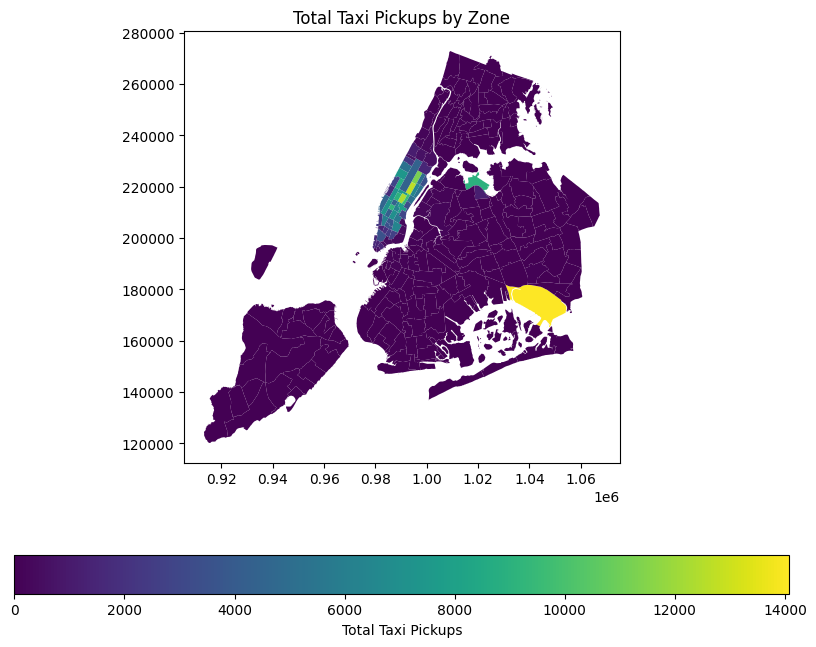

In [539]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the map and display it

zones.plot(
    column="total_trips",
    ax=ax ,
    legend=True,  
    legend_kwds = {'label': "Total Taxi Pickups", 'orientation': "horizontal"})
plt.title("Total Taxi Pickups by Zone")
plt.show()


In [256]:
# can you try displaying the zones DF sorted by the number of trips?
zones = zones.sort_values(by="total_trips", ascending=False)
zones_sorted.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,total_trips
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",14081.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",12671.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",12325.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",11265.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",9536.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


# Below is the findings
### Busiest hours, days and months
 * Busiest hours is between 17:00 and 19:00 and busiest hour is 18:00
 * Busiest Day is Thursday
 * Busies month is October

### Trends in revenue collected
 * Revenue collection is more in May and Octber months

### Trends in revenue collected
 * Revenue is collected more in Quarter 2 and Quarter 4. Quarter 4 is higher propertion of 27%
### How fare depends on trip distance, trip duration and passenger counts
 * Fare amount is increases up to 50 miles. From 50 - 100 miles fare increases more. 
 * Fare is not the proportation to increasing duration. Duration might be depend on traffic jam also.
 * As per the plot single passenger are more travelling in taxi. 

### How tip amount depends on trip distance
 * Tip is more collected with shourter distances. 
### Busiest zones
 * JFK airport is the busiest zone and next busiest area is Upper East Side South

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [279]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,Airport_fee,pickup_hour,pickup_day_of_week,pickup_month,month,quarter,trip_duration,trip_duration_hours,speed_mph
0,2,2023-12-01 00:14:36,2023-12-01 00:14:43,1.0,0.00,2.0,N,79,79,2,...,-2.5,0.00,0,4,12,12,4,0.116667,0.001944,0.000000
1,2,2023-12-01 00:23:40,2023-12-01 00:34:57,1.0,2.39,1.0,N,158,230,1,...,2.5,0.00,0,4,12,12,4,11.283333,0.188056,12.709010
2,2,2023-12-01 00:21:30,2023-12-01 00:31:16,1.0,1.55,1.0,N,246,164,1,...,2.5,0.00,0,4,12,12,4,9.766667,0.162778,9.522184
3,1,2023-12-01 00:04:48,2023-12-01 00:32:08,1.0,10.90,1.0,N,138,231,1,...,2.5,1.75,0,4,12,12,4,27.333333,0.455556,23.926829
4,2,2023-12-01 00:20:50,2023-12-01 00:34:22,2.0,1.56,1.0,N,100,68,1,...,2.5,0.00,0,4,12,12,4,13.533333,0.225556,6.916256


In [377]:
# Find routes which have the slowest speeds at different times of the day
# Convert duration to hours
df['trip_duration_hours'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600 

# Avoid distance < 0 and duration < 0 
df = df[(df['trip_distance'] > 0) & (df['trip_duration_hours'] > 0)]

# Calculate speed (miles per hour)
df['speed_mph'] = df['trip_distance'] / df['trip_duration_hours']

# Group by route (Pickup & Dropoff zone) and hour of the day
slow_routes = df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour', 'trip_distance'])['speed_mph'].mean().reset_index()

# Sort by slowest speeds (ascending order)
slow_routes = slow_routes.sort_values(by='speed_mph', ascending=True)

# Display the top slowest routes
print(slow_routes.head(10))  # Top 10 slowest routes



        PULocationID  DOLocationID  pickup_hour  trip_distance  speed_mph
63006            132           132            0           0.05   0.002179
113855           161            40           18           0.08   0.012827
168190           229           162            8           0.31   0.013097
150283           170           162            7           0.34   0.014236
229319           249           125           11           0.37   0.015573
18847             68            68           19           0.41   0.017154
118801           161           163            9           0.44   0.018352
34129             87           132           20           0.02   0.020339
10280             48            79           19           0.01   0.021127
143537           164           186           17           0.51   0.021376


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

****************************************
Busiest hour of the day is:  18 :00
****************************************



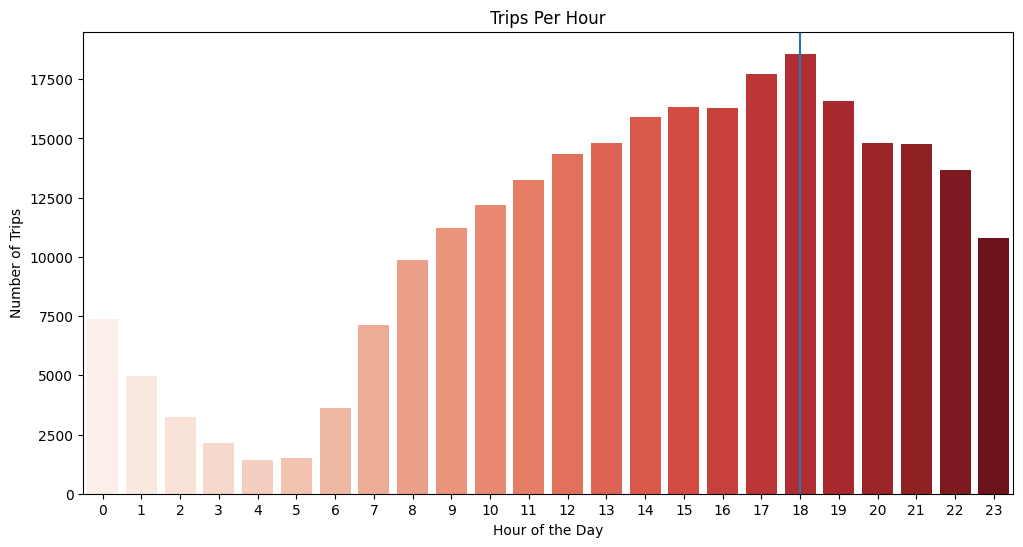

In [367]:
# Visualise the number of trips per hour and find the busiest hour

# Count trips per hour
hourly_trips = df['pickup_hour'].value_counts().sort_index()

# Find the busiest hour
busiest_hour = hourly_trips.idxmax()
busiest_hour_count = hourly_trips.max()

# Plot hourly trip distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="Reds")
print("****************************************")
print("Busiest hour of the day is: ",busiest_hour,":00")
print("****************************************", end="\n\n")
# Add labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Trips Per Hour")
plt.xticks(range(24))  # Ensure all hours are shown

# Highlight the busiest hour
plt.axvline(x=busiest_hour)

# Show plot
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [385]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Group by hour and count trips
busiest_hours = df.groupby("pickup_hour").size().reset_index(name="trip_count")

# Sort by trip count in descending order and pick the top 5 busiest hours
top_5_busiest_hours = busiest_hours.sort_values(by="trip_count", ascending=False).head(5)

# Scale up the trip counts
top_5_busiest_hours["actual_trips"] = (top_5_busiest_hours["trip_count"] / sample_fraction).astype(int)

# Display the result
print(top_5_busiest_hours)



    pickup_hour  trip_count  actual_trips
18           18       18577        371540
17           17       17724        354480
19           19       16590        331800
15           15       16339        326780
16           16       16301        326020


In [387]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Airport_fee,pickup_hour,pickup_day_of_week,pickup_month,month,quarter,trip_duration,trip_duration_hours,speed_mph,trip_duration_minutes
1,2,2023-12-01 00:23:40,2023-12-01 00:34:57,1.0,2.39,1.0,N,158,230,1,...,0.00,0,4,12,12,4,11.283333,0.188056,12.709010,11.283333
2,2,2023-12-01 00:21:30,2023-12-01 00:31:16,1.0,1.55,1.0,N,246,164,1,...,0.00,0,4,12,12,4,9.766667,0.162778,9.522184,9.766667
3,1,2023-12-01 00:04:48,2023-12-01 00:32:08,1.0,10.90,1.0,N,138,231,1,...,1.75,0,4,12,12,4,27.333333,0.455556,23.926829,27.333333
4,2,2023-12-01 00:20:50,2023-12-01 00:34:22,2.0,1.56,1.0,N,100,68,1,...,0.00,0,4,12,12,4,13.533333,0.225556,6.916256,13.533333
5,2,2023-12-01 00:36:07,2023-12-01 00:52:26,1.0,3.39,1.0,N,143,249,0,...,0.00,0,4,12,12,4,16.316667,0.271944,12.465781,16.316667


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

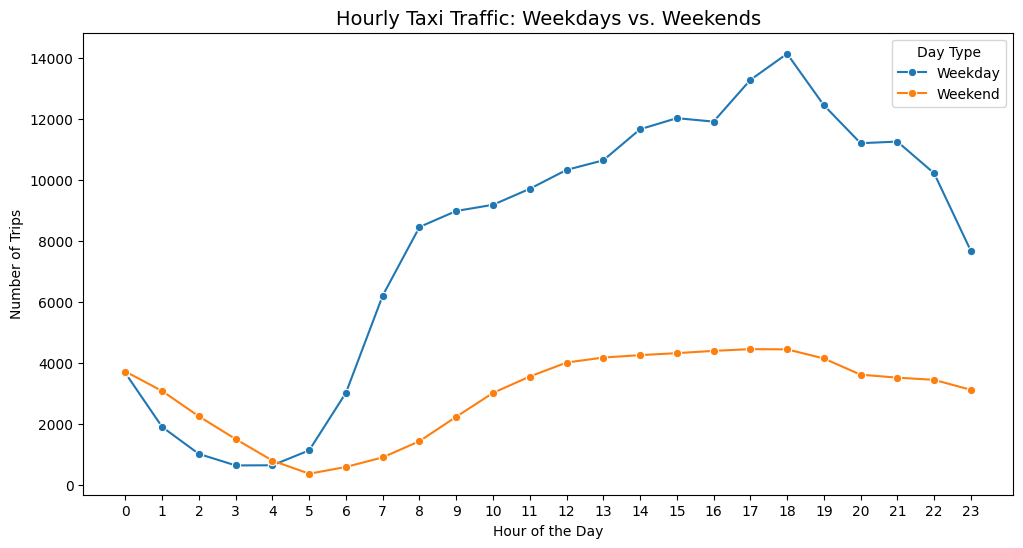

In [395]:
# Compare traffic trends for the week days and weekends
# Categorize into weekday and weekend
df["is_weekend"] = df["pickup_day_of_week"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

# Group by hour and category (Weekday/Weekend)
hourly_traffic = df.groupby(["pickup_hour", "is_weekend"]).size().reset_index(name="trip_count")

# Plot the hourly trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_traffic, x="pickup_hour", y="trip_count", hue="is_weekend", marker="o")

# Formatting
plt.title("Hourly Taxi Traffic: Weekdays vs. Weekends", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))
plt.legend(title="Day Type")

# Show plot
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [397]:
# Find top 10 pickup and dropoff zones
# Count trips for pickup and dropoff locations
top_pickup_zones = df["PULocationID"].value_counts().head(10).reset_index()
top_dropoff_zones = df["DOLocationID"].value_counts().head(10).reset_index()

# Rename columns
top_pickup_zones.columns = ["LocationID", "pickup_count"]
top_dropoff_zones.columns = ["LocationID", "dropoff_count"]

# Merge with zones GeoDataFrame to get the zone names
top_pickup_zones = top_pickup_zones.merge(zones[["LocationID", "zone"]], on="LocationID", how="left")
top_dropoff_zones = top_dropoff_zones.merge(zones[["LocationID", "zone"]], on="LocationID", how="left")

# Display results
print("Top 10 Pickup Zones:\n", top_pickup_zones)
print("\nTop 10 Dropoff Zones:\n", top_dropoff_zones)


Top 10 Pickup Zones:
    LocationID  pickup_count                          zone
0         132         13785                   JFK Airport
1         237         12574         Upper East Side South
2         161         12169                Midtown Center
3         236         11134         Upper East Side North
4         162          9445                  Midtown East
5         186          9100  Penn Station/Madison Sq West
6         138          8935             LaGuardia Airport
7         230          8835     Times Sq/Theatre District
8         142          8602           Lincoln Square East
9         170          7837                   Murray Hill

Top 10 Dropoff Zones:
    LocationID  dropoff_count                       zone
0         236          11553      Upper East Side North
1         237          10955      Upper East Side South
2         161          10204             Midtown Center
3         230           8149  Times Sq/Theatre District
4         170           7782        

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [407]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Count trips for each pickup and dropoff location
pickup_counts = df["PULocationID"].value_counts().reset_index()
dropoff_counts = df["DOLocationID"].value_counts().reset_index()

# Rename columns
pickup_counts.columns = ["LocationID", "pickup_count"]
dropoff_counts.columns = ["LocationID", "dropoff_count"]

# Merge pickup and dropoff counts into a single DataFrame
location_trips = pickup_counts.merge(dropoff_counts, on="LocationID", how="outer").fillna(0)

# Compute pickup/dropoff ratio
location_trips["pickup_dropoff_ratio"] = location_trips["pickup_count"] / (location_trips["dropoff_count"] + 1)

# Merge with zone names
location_trips = location_trips.merge(zones[["LocationID", "zone"]], on="LocationID", how="left")

# Sort by ratio
top_10_ratios = location_trips.sort_values("pickup_dropoff_ratio", ascending=False).head(10)
bottom_10_ratios = location_trips.sort_values("pickup_dropoff_ratio", ascending=True).head(10)

# Display results
print("Top 10 Pickup/Dropoff Ratios:\n", top_10_ratios.to_string(index=False))
print("\nBottom 10 Pickup/Dropoff Ratios:\n", bottom_10_ratios.to_string(index=False))


Top 10 Pickup/Dropoff Ratios:
  LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio                         zone
         70        1180.0            150              7.814570                East Elmhurst
        132       13785.0           3154              4.369255                  JFK Airport
        138        8935.0           3438              2.598139            LaGuardia Airport
        186        9100.0           5641              1.612903 Penn Station/Madison Sq West
         44           3.0              1              1.500000       Charleston/Tottenville
        114        3464.0           2479              1.396774      Greenwich Village South
         43        4405.0           3288              1.339313                 Central Park
        249        5811.0           4380              1.326409                 West Village
        162        9445.0           7479              1.262701                 Midtown East
        161       12169.0          10204         

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [431]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter trips for night hours (11 PM to 5 AM)
night_hours = merged_df[(merged_df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# Top 10 Pickup Zones
top_10_pickup_zones = night_hours["PULocationID"].value_counts().head(10).reset_index()
# Rename columns
top_10_pickup_zones.columns = ['LocationID','Count']

# Merge with Zone to get zone name
top_10_pickup_zones = top_10_pickup_zones.merge(zones[["LocationID", "zone"]], on="LocationID", how="left")

# Top 10 Dropoff Zones
top_10_dropoff_zones = night_hours['DOLocationID'].value_counts().head(10).reset_index()
# Rename columns
top_10_dropoff_zones.columns = ['LocationID','Count']
# Merge with Zone to get zone name
top_10_dropoff_zones = top_10_dropoff_zones.merge(zones[["LocationID", "zone"]], on="LocationID", how="left")


# Print results
print("Top 10 Pickup Zones (11 PM - 5 AM):\n", top_10_pickup_zones)
print("\nTop 10 Dropoff Zones (11 PM - 5 AM):\n", top_10_dropoff_zones)


Top 10 Pickup Zones (11 PM - 5 AM):
    LocationID  Count                          zone
0         132   1869                   JFK Airport
1          79   1736                  East Village
2         249   1341                  West Village
3          48   1282                  Clinton East
4         186   1132  Penn Station/Madison Sq West
5         230   1097     Times Sq/Theatre District
6         148    999               Lower East Side
7         114    888       Greenwich Village South
8          68    846                  East Chelsea
9         107    844                      Gramercy

Top 10 Dropoff Zones (11 PM - 5 AM):
    LocationID  Count                       zone
0         161   1047             Midtown Center
1         170    947                Murray Hill
2          79    935               East Village
3          68    908               East Chelsea
4         236    880      Upper East Side North
5         162    848               Midtown East
6          48    827       

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [543]:
# Filter for night hours (11 PM to 5 AM)



# Filter trips for night hours (11 PM to 5 AM)
night_hours = merged_df[(merged_df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
# Ensure fare amount should be more than 0 
night_hours = night_hours[night_hours["total_amount"] > 0]

night_revenue = night_hours['total_amount'].sum()

day_hours = merged_df[(merged_df['pickup_hour'] >= 6) | (df['pickup_hour'] <= 22)]
# Ensure fare amount should be more than 0 
day_hours = day_hours[day_hours["total_amount"] > 0]

day_revenue = day_hours['total_amount'].sum()

total_revnue = day_revenue + night_revenue

# Calculate revenue share percentage
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100


print(f"Total revenue in night : ${night_revenue:,.2f}")
print(f"Totay revenue in day : ${day_revenue:,.2f}")
print(f"Total revenue : ${total_revenue:,.2f}")
print(f"Day Revenue Share (6 AM - 10 PM): {day_share:,.2f}%")
print(f"Night Revenue Share (11 PM - 5 AM): {night_share:,.2f}%")


Total revenue in night : $898,919.29
Totay revenue in day : $7,460,023.62
Total revenue : $7,637,623.63
Day Revenue Share (6 AM - 10 PM): 97.67%
Night Revenue Share (11 PM - 5 AM): 11.77%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [465]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out trips with zero distance to avoid division errors
valid_trips = df[df["trip_distance"] > 0]

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Group by passenger count and compute average fare per mile
avg_fare_per_mile = valid_trips.groupby("passenger_count")["fare_per_mile"].mean().reset_index()
avg_fare_per_mile.columns = ["Passenger Count", "Fare per Passenger"]
# Display results
print(avg_fare_per_mile)




   Passenger Count  Fare per Passenger
0              1.0           10.225049
1              2.0           10.566642
2              3.0           11.389079
3              4.0           22.769830
4              5.0            8.997040
5              6.0            8.095708


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Average fare per mile for different days 
 day_of_week
0    11.172373
1     9.889369
2    11.082087
3    10.663409
4    11.045872
5    10.853204
6     8.889543
Name: fare_per_mile, dtype: float64
Average fare per mile for different times 
 hour_of_day
0      9.517990
1      6.969555
2      8.832081
3      7.399981
4     15.278854
5     11.265214
6      7.658200
7     10.105886
8      9.286317
9     10.477078
10     9.322365
11     9.948703
12    12.104343
13    10.490766
14    12.021828
15    11.741916
16    12.757014
17    11.398142
18    11.130253
19    10.947188
20    10.528134
21     9.455426
22     9.291242
23     8.522549
Name: fare_per_mile, dtype: float64


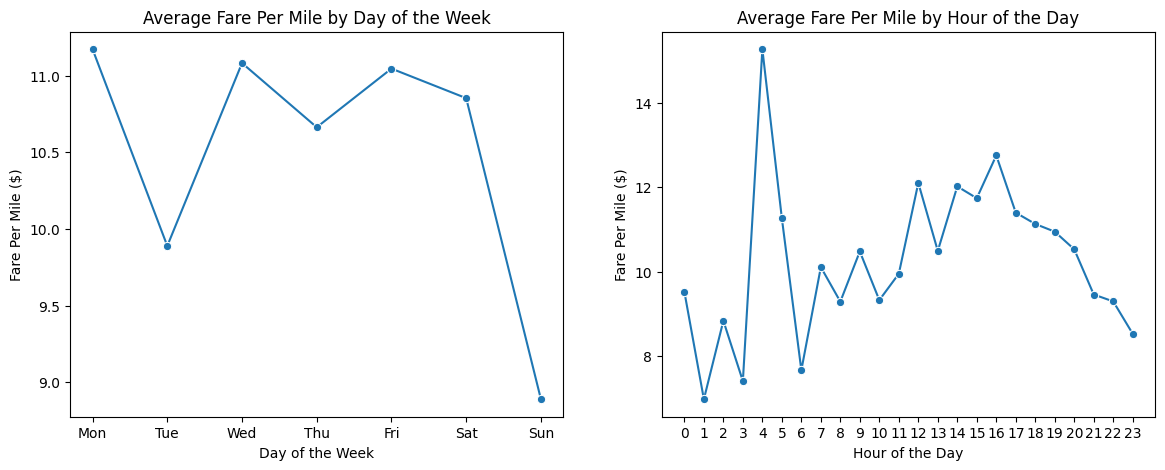

In [483]:
# Compare the average fare per mile for different days and for different times of the day

# Filter out trips with zero distance to avoid division errors & Calculate fare per mile
# Get the valid trips after filger from above calcuation

# Extract day of week
valid_trips["day_of_week"] = valid_trips["tpep_pickup_datetime"].dt.dayofweek
# Extract hour of the day (24)
valid_trips["hour_of_day"] = valid_trips["tpep_pickup_datetime"].dt.hour

# Group by day of the week
avg_fare_per_mile_day = valid_trips.groupby("day_of_week")["fare_per_mile"].mean()

# Group by hour of the day
avg_fare_per_mile_hour = valid_trips.groupby("hour_of_day")["fare_per_mile"].mean()

print("Average fare per mile for different days \n", avg_fare_per_mile_day)
print("Average fare per mile for different times \n", avg_fare_per_mile_hour)

# Plot trends
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Plot fare per mile by day of week
sns.lineplot(x=avg_fare_per_mile_day.index, y=avg_fare_per_mile_day.values, ax=axes[0], marker="o")
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
axes[0].set_title("Average Fare Per Mile by Day of the Week")
axes[0].set_ylabel("Fare Per Mile ($)")
axes[0].set_xlabel("Day of the Week")

# Plot fare per mile by hour of the day
sns.lineplot(x=avg_fare_per_mile_hour.index, y=avg_fare_per_mile_hour.values, ax=axes[1], marker="o")
axes[1].set_xticks(range(24))
axes[1].set_title("Average Fare Per Mile by Hour of the Day")
axes[1].set_ylabel("Fare Per Mile ($)")
axes[1].set_xlabel("Hour of the Day")

plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

   VendorID  fare_per_mile
0         1       8.107529
1         2      11.370507
2         6       5.248006


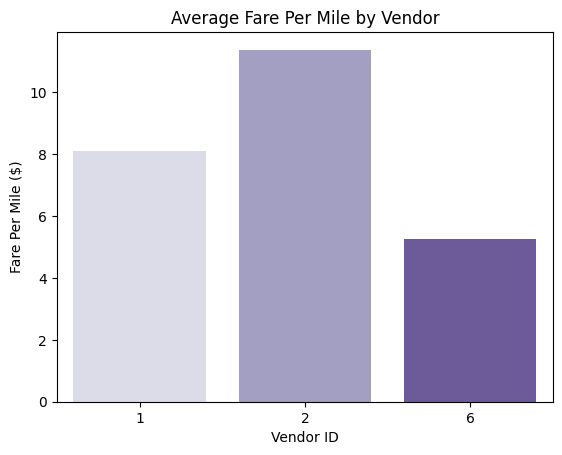

In [507]:
# Compare fare per mile for different vendors

# Filter out trips with zero distance to avoid division errors & Calculate fare per mile
# Get the valid_trips after filger from above calcuation

# Group by VendorID and compute average fare per mile
avg_fare_per_mile_vendor = valid_trips.groupby("VendorID")["fare_per_mile"].mean().reset_index()
print(avg_fare_per_mile_vendor)

# Plot the comparison
plt.figure()
sns.barplot(data=avg_fare_per_mile_vendor, x="VendorID", y="fare_per_mile", palette="Purples")
plt.title("Average Fare Per Mile by Vendor")
plt.ylabel("Fare Per Mile ($)")
plt.xlabel("Vendor ID")

plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


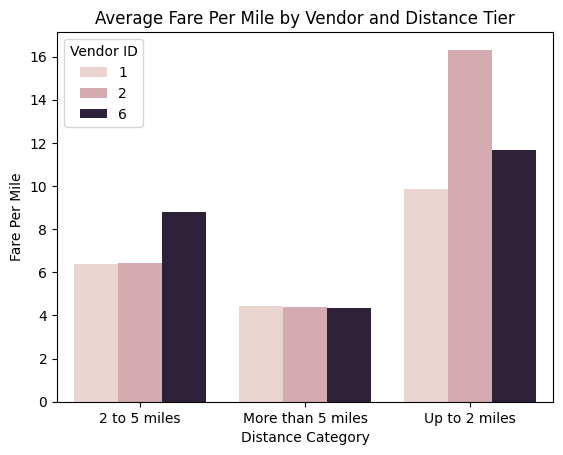

In [545]:
# Defining distance tiers
def distance_tiers(distance):
    if distance <= 2:
        return "Up to 2 miles"
    elif 2 < distance <= 5:
        return "2 to 5 miles"
    else:
        return "More than 5 miles"

# Filter out trips with zero distance to avoid division errors & Calculate fare per mile
# Get the valid_trips after filger from above calcuation
# Create a new column for distance category
valid_trips["distance_category"] = valid_trips["trip_distance"].apply(distance_tiers)

# Group by VendorID and Distance Category to calculate mean fare per mile
avg_fare_per_mile_tiered = (
    valid_trips.groupby(["VendorID", "distance_category"])["fare_per_mile"]
    .mean()
    .reset_index()
)

# Plot the results
plt.figure()
sns.barplot(
    data=avg_fare_per_mile_tiered,
    x="distance_category",
    y="fare_per_mile",
    hue="VendorID",
)

plt.title("Average Fare Per Mile by Vendor and Distance Tier")
plt.ylabel("Fare Per Mile")
plt.xlabel("Distance Category")
plt.legend(title="Vendor ID")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

Analyze tip percentages based on distances 



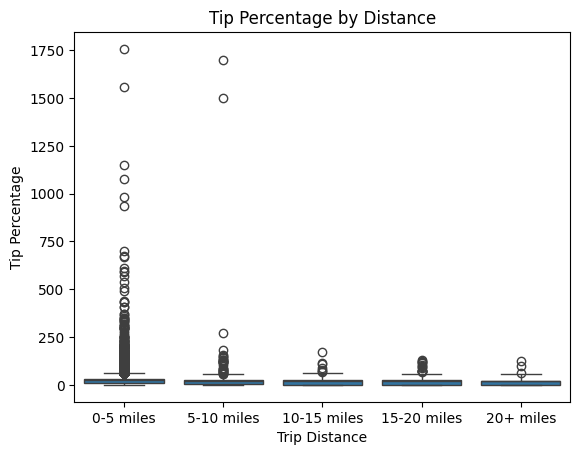

In [583]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Ensure valid fare amounts to avoid division by zero
df = df[df["fare_amount"] > 0]

# Calculate Tip Percentage
df["tip_percentage"] = (df["tip_amount"] / df["fare_amount"]) * 100
# Remove tip percentage outliers & consider only below < 2000%
df = df[df["tip_percentage"] < 2000]

# Categorizing distance into bins
bins = [0, 5, 10, 15, 20, df["trip_distance"].max()]
labels = ["0-5 miles", "5-10 miles", "10-15 miles", "15-20 miles", "20+ miles"]
df["distance_category"] = pd.cut(df["trip_distance"], bins=bins, labels=labels)

# Boxplot for tip percentage by distance
print("Analyze tip percentages based on distances \n")
sns.boxplot(data=df, x="distance_category", y="tip_percentage")
plt.title("Tip Percentage by Distance")
plt.xlabel("Trip Distance")
plt.ylabel("Tip Percentage")
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

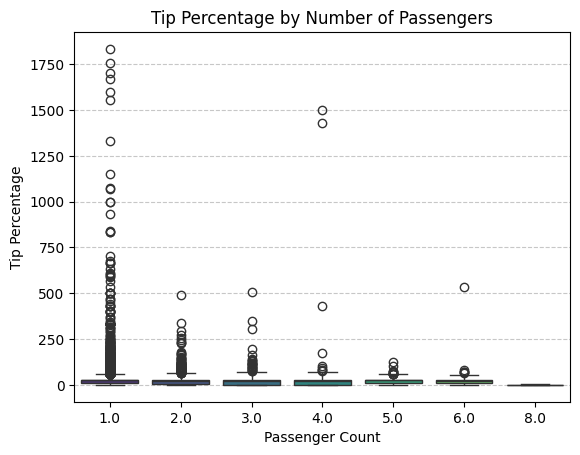

In [587]:
# Analyse tip percentage base on pasenger count

# Ensure valid passenger count 
df = df[df["passenger_count"] > 0]

sns.boxplot(data=df, x="passenger_count", y="tip_percentage", palette="viridis")
plt.title("Tip Percentage by Number of Passengers")
plt.xlabel("Passenger Count")
plt.ylabel("Tip Percentage")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

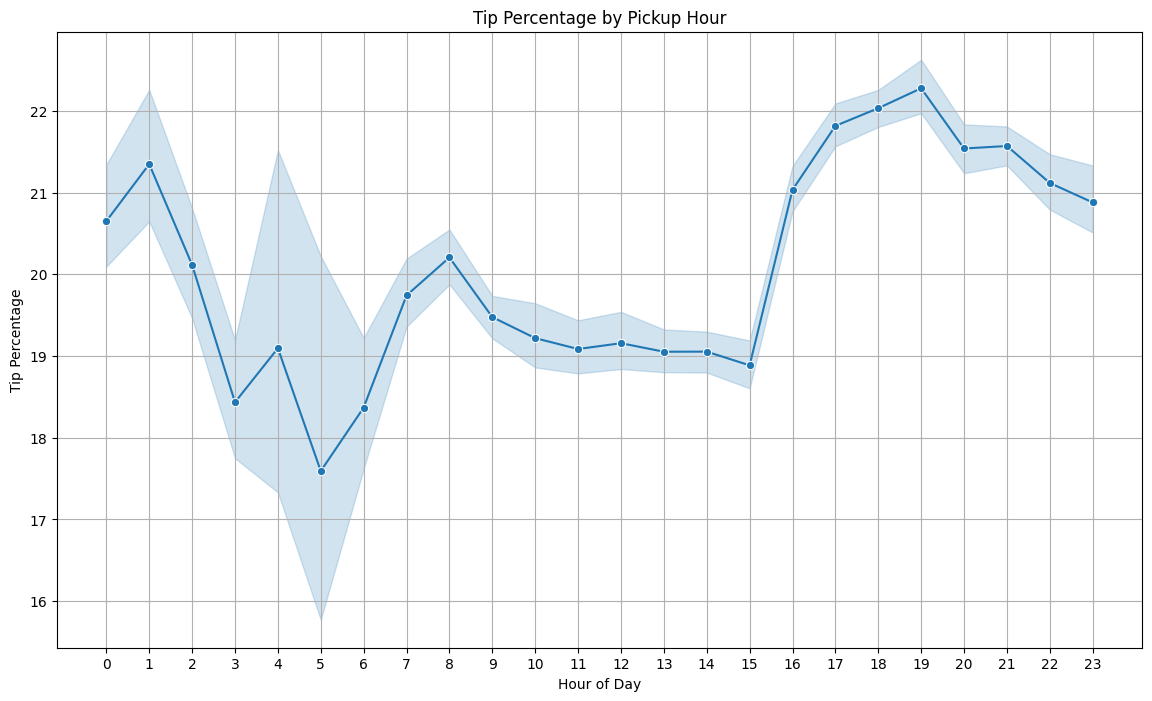

In [619]:
# Analyze tip percentages based on pickup times

df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
plt.figure(figsize=(14,8))
sns.lineplot(data=df, x="pickup_hour", y="tip_percentage", marker="o")
plt.title("Tip Percentage by Pickup Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Tip Percentage")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [625]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Based on the previous calucation we can reuse tip_percentage
# get low tip percentage < 10% and high percentage > 25%
low_tip = df[df["tip_percentage"] < 10]  
high_tip = df[df["tip_percentage"] > 25]

# Calculate avarage distance in these categories
avg_distance_low = low_tip["trip_distance"].mean()
avg_distance_high = high_tip["trip_distance"].mean()

print(f"Avg Trip Distance ( Tip <10%): {avg_distance_low:.2f} miles")
print(f"Avg Trip Distance ( Tip >25%): {avg_distance_high:.2f} miles")


Avg Trip Distance ( Tip <10%): 4.23 miles
Avg Trip Distance ( Tip >25%): 2.30 miles


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

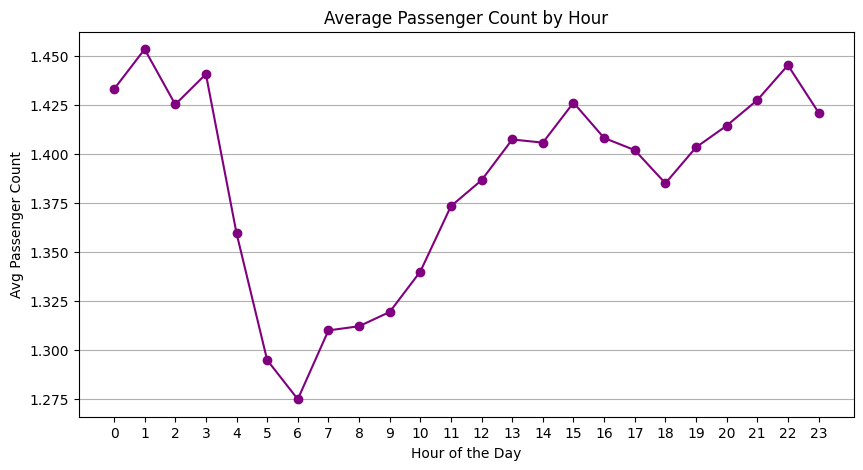

In [631]:
# See how passenger count varies across hours and days

# Passenger count varis accross hours
hourly_passenger_count = df.groupby("pickup_hour")["passenger_count"].mean()

plt.figure(figsize=(10, 5))
plt.plot(hourly_passenger_count.index, hourly_passenger_count, marker="o", color="purple")
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Passenger Count")
plt.title("Average Passenger Count by Hour")
plt.xticks(range(0, 24))
plt.grid(axis="y")
plt.show()


In [635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251556 entries, 1 to 268149
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               251556 non-null  int64         
 1   tpep_pickup_datetime   251556 non-null  datetime64[us]
 2   tpep_dropoff_datetime  251556 non-null  datetime64[us]
 3   passenger_count        251556 non-null  float64       
 4   trip_distance          251556 non-null  float64       
 5   RatecodeID             251556 non-null  float64       
 6   store_and_fwd_flag     251556 non-null  object        
 7   PULocationID           251556 non-null  int64         
 8   DOLocationID           251556 non-null  int64         
 9   payment_type           251556 non-null  int64         
 10  fare_amount            251556 non-null  float64       
 11  extra                  251556 non-null  float64       
 12  mta_tax                251556 non-null  float64  

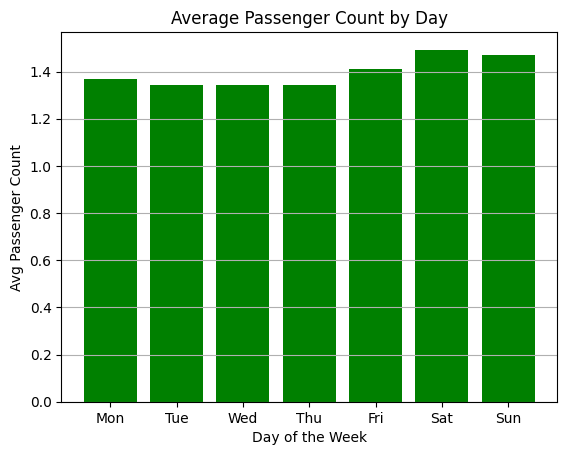

In [645]:
# Avarage passenger count varies accross Days
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek
daily_passenger_count = df.groupby("pickup_day")["passenger_count"].mean()
plt.bar(daily_passenger_count.index, daily_passenger_count, color="green")
plt.xlabel("Day of the Week")
plt.ylabel("Avg Passenger Count")
plt.title("Average Passenger Count by Day")
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.grid(axis="y")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

                        zone  passenger_count
229              Westerleigh         3.000000
106          Highbridge Park         3.000000
53              Country Club         2.000000
27                Bronx Park         2.000000
5               Astoria Park         2.000000
9               Battery Park         1.938931
32            Bushwick North         1.857143
179                Ridgewood         1.750000
175          Randalls Island         1.750000
25   Briarwood/Jamaica Hills         1.695652


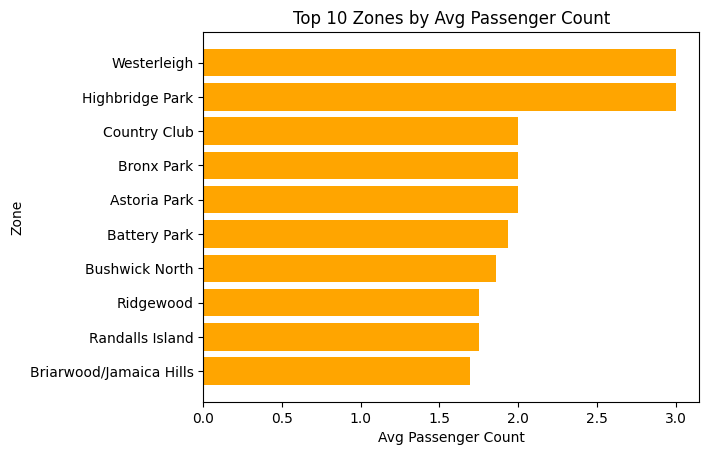

In [664]:
# How does passenger count vary across zones
passenger_by_zone = df.groupby("PULocationID")["passenger_count"].mean().reset_index()
passenger_by_zone = passenger_by_zone.merge(zones, left_on="PULocationID", right_on="LocationID")
passenger_by_zone = passenger_by_zone.sort_values(by="passenger_count", ascending=False)

print(passenger_by_zone[["zone", "passenger_count"]].head(10)) 
top_zones = passenger_by_zone.nlargest(10, "passenger_count")
plt.barh(top_zones["zone"], top_zones["passenger_count"], color="orange")
plt.xlabel("Avg Passenger Count")
plt.ylabel("Zone")
plt.title("Top 10 Zones by Avg Passenger Count")
plt.gca().invert_yaxis()
plt.show()

In [697]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268085 entries, 0 to 268084
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               268085 non-null  int64         
 1   tpep_pickup_datetime   268085 non-null  datetime64[us]
 2   tpep_dropoff_datetime  268085 non-null  datetime64[us]
 3   passenger_count        268085 non-null  float64       
 4   trip_distance          268085 non-null  float64       
 5   RatecodeID             268085 non-null  float64       
 6   store_and_fwd_flag     268085 non-null  object        
 7   PULocationID_x         268085 non-null  int64         
 8   DOLocationID           268085 non-null  int64         
 9   payment_type           268085 non-null  int64         
 10  fare_amount            268085 non-null  float64       
 11  extra                  268085 non-null  float64       
 12  mta_tax                268085 non-null  floa

                            zone  avg_passenger_count_y
0                   East Village               1.406361
1  Meatpacking/West Village West               1.511628
2      West Chelsea/Hudson Yards               1.434670
3              LaGuardia Airport               1.379114
4               Garment District               1.461010
5            Lincoln Square West               1.332051
6          Upper East Side South               1.353536
7            Little Italy/NoLiTa               1.481691
8                           SoHo               1.456257
9                 Midtown Center               1.397008


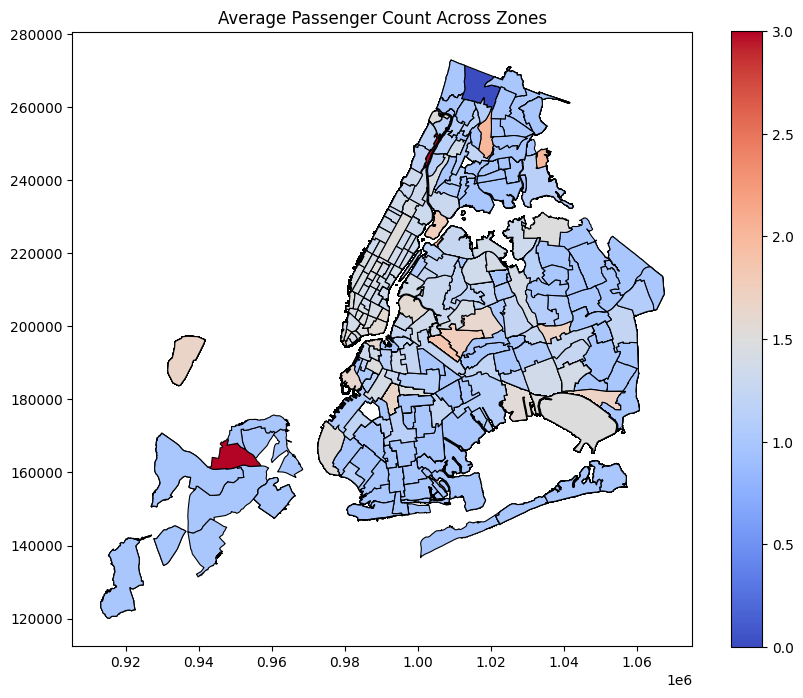

In [709]:
# Merge with average passenger count

# Set geometry column
merged_df = merged_df.set_geometry("geometry")

# Fill NaN values with 0
merged_df["avg_passenger_count_y"].fillna(0, inplace=True)

# Check first few rows
print(merged_df[["zone", "avg_passenger_count_y"]].head(10))

fig, ax = plt.subplots(figsize=(10, 8))
merged_df.plot(column="avg_passenger_count_y", cmap="coolwarm", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
plt.title("Average Passenger Count Across Zones")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

improvement_surcharge    99.974956
congestion_surcharge     92.276074
dtype: float64


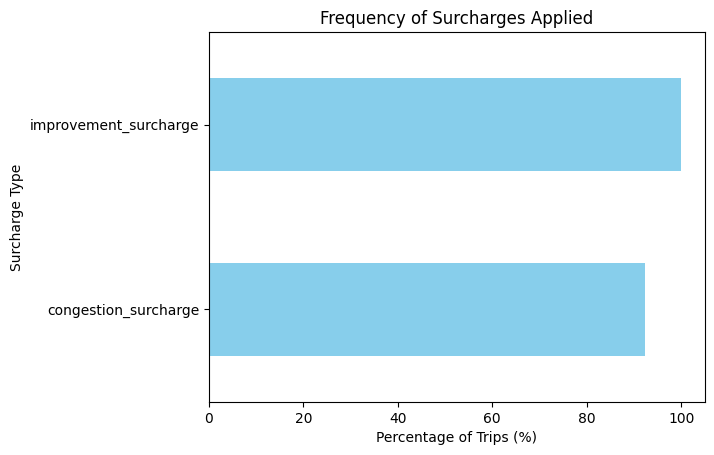

In [717]:
# How often is each surcharge applied?

surcharge_columns = [ "improvement_surcharge", "congestion_surcharge"]

# Calculate percentage of trips where surcharge is applied
surcharge_applied = (df[surcharge_columns] > 0).mean() * 100

# Display result
print(surcharge_applied.sort_values(ascending=False))

surcharge_applied.sort_values().plot(kind="barh", color="skyblue")
plt.xlabel("Percentage of Trips (%)")
plt.ylabel("Surcharge Type")
plt.title("Frequency of Surcharges Applied")
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies



## Optimize Airport Pickups & Reduce Idle Time

**Observation : JFK Airport is the top pickup location.**

**Recommendation:**

 - Pre-position taxis at JFK during peak hours to reduce wait times for arriving passengers. 
 - Use real-time flight data to predict demand surges and allocate more cabs accordingly.

## Adjust Supply for Peak Demand Hours
**Observation: Peak pickup hour is 18:00 (6 PM).**

**Recommendation**:
 - Surge pricing strategies should be applied during this hour to maximize revenue.
 - Encourage more drivers to be available from 5 PM to 7 PM to avoid shortages.
 - Dynamic dispatching system: Direct drivers toward high-demand areas before peak hour starts.

## Route Optimization to Reduce Dead Miles

**Observation: Midtown Center is the top drop-off zone.**

**Recommendation**:
 - Guide empty taxis from Midtown to JFK to balance demand between these key zones.
 - Identify common return-trip demand routes to minimize empty backhaul trips.

## Improve Fare Efficiency for Vendors

**Observation**:
 - Vendor 2 has the highest fare per mile → Efficient pricing strategy.
 - Vendor 6 has the lowest fare per mile → Possible underpricing issue.

**Recommendation**:
 - Re-evaluate Vendor 6’s fare pricing model to align with market rates.
 - Monitor customer retention for Vendor 2: Is the higher fare affecting repeat usage?
 - Encourage fare-based competition among vendors to improve pricing strategies.

## Reduce Operational Inefficiencies

**Observation: Some trips have zero distance but non-zero fares (possible fraudulent entries).**

**Recommendation**:
 - Detect and eliminate fraudulent rides by cross-verifying trip logs with GPS data.
 - Ensure accurate fare calculations by mandating GPS tracking validation.

## Final Thoughts
By implementing data-driven routing, pricing, and demand forecasting strategies, taxi companies can increase efficiency, reduce dead miles, and boost revenues.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.


## ** Strategic Positioning of Cabs Based on Trip Trends **  

### Peak Hour Strategy
**Observation:** Hour 18 (6 PM) is the busiest.  
**Recommendation:**  
- Position cabs near commercial districts (Midtown, Downtown) from 4 PM onwards.  
- Shift more cabs toward residential areas (Brooklyn, Queens) between 7–9 PM.  
- Increase short-haul cab availability during peak evening hours.  

### Airport-Based Allocation
**Observation:** JFK Airport is the busiest pickup location.  
**Recommendation:**  
- Pre-position cabs at JFK & LaGuardia based on flight schedules.  
- Use real-time flight tracking to adjust supply.  
- Promote pre-booked rides to minimize idle waiting.  

### Weekday vs. Weekend Strategy
**Observation:** Weekdays are busier than weekends.  
**Recommendation:**  
- Increase cabs in office-heavy areas (Midtown, Wall Street) during commute hours.  
- Deploy more cabs in nightlife hubs (Times Square, Williamsburg) on weekends.  
- Promote shared rides on weekdays to handle high demand.  

### Seasonal & Monthly Trends
**Observation:** Demand fluctuates seasonally.  
**Recommendation:**  
- Allocate more cabs near transit hubs in winter to help commuters.  
- Position cabs in tourist-heavy areas during summer months.  
- Adjust cab supply for major events like NYC Marathon and Fashion Week.  

### Late-Night (11 PM – 5 AM) Coverage 
**Observation:** High demand in nightlife zones but lower driver availability.  
**Recommendation:**   
- Encourage drivers to work late-night shifts with incentives.  
- Position cabs near clubbing hotspots to maximize earnings.  

### Reducing Idle Time & Dead Miles 
**Observation:** Many empty return trips from drop-off zones.  
**Recommendation:**  
- Use heat maps to predict demand and reposition empty cabs.  
- Incentivize return trips to high-demand pickup locations.  
- Promote carpooling for short-distance trips to optimize vehicle use.  

## **Conclusion**  
Aligning cab distribution with demand trends can **increase efficiency, reduce downtime, and maximize revenue**.  


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

## **Data-Driven Pricing Strategy Adjustments**  

### Peak Hour Surge Pricing
**Observation:** High demand at 6 PM but limited supply.  
**Recommendation:**  
- Introduce dynamic pricing between **5–8 PM** to optimize revenue.  
- Offer **discounts on shared rides** to encourage pooling during peak hours.  
- Adjust **minimum fare and base fare slightly upward** during high-demand slots.  

### Distance-Based Fare Adjustments
**Observation:** Vendor 2 has the highest fare per mile; Vendor 6 has the lowest.  
**Recommendation:**  
- Standardize **fare per mile** across vendors to remain competitive.  
- Offer **discounted fares for short trips (<2 miles)** to attract more riders.  
- Implement a **flat-rate fare for long trips (>10 miles)** to increase accessibility.  

### Nighttime & Airport Pricing Optimization
**Observation:** Nighttime demand (11 PM–5 AM) and airport pickups are high.  
**Recommendation:**  
- Increase **nighttime base fare** while keeping per-mile rates stable.  
- Implement a **fixed-rate pricing structure for airport rides** to attract more passengers.  
- Reduce **dead miles** by offering drivers bonuses for airport return trips.  

### Incentivizing High-Tipping Routes
**Observation:** Tips are higher for long-distance and premium service trips.  
**Recommendation:**  
- Offer **tiered fare structures** (standard, premium) for better rider choice.  
- Provide **discounts or credits for frequent travelers** using long-distance rides.  
- Promote **in-app tipping incentives** to increase driver earnings.  

### Competitive Pricing & Loyalty Programs
**Observation:** Need to balance revenue with rider retention.  
**Recommendation:**  
- Introduce a **subscription model** for frequent riders with discounted rates.  
- Offer **off-peak ride discounts** to encourage demand in slower hours.  
- Use **AI-driven fare adjustments** based on real-time demand and competitor pricing.  

### Conclusion
By leveraging **demand-based pricing, competitive rate adjustments, and targeted discounts**, vendors can **maximize revenue while maintaining rider satisfaction**.  
